## Introduction

Let me start by saying that this notebook is meant to be a way to improve both my Python and Machine Learning skills, using Andrew Ng's Machine Learning course as basis. The first exercise is divided in two parts: linear regression with one variable and with multiple variables. Taking into account that is possible to generalize the code to accept any number of features, i chose to divide these sections by their themes: predicting profits for a food truck and predicting the price of houses. I also splitted these exercises into two files, this one corresponding to the prediction of profits for a food truck.

In [2]:
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import local modules.
module_path = '{}/src'.format(os.path.abspath(os.path.join('..')))
if module_path not in sys.path:
    sys.path.append(module_path)

from linear_regression import cost, gradient_descent

## Loading the Data
- [Pandas][1]' [read_csv][2] was used to read the data into a [dataframe][3];
- Custom column names was passed as argument according to the description of the exercise;
- Pandas' [head][4] was used to show some examples of the data.

[1]: https://pandas.pydata.org/pandas-docs/stable/
[2]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
[3]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
[4]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [3]:
df = pd.read_csv(
    '../../data/ex1data1.txt', delimiter=',',
    header=None, names=['population', 'profit']
)

df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


## Visualizing the data
- [Matplotlib][1]'s [subplots][2] was used thinking of later plots;
- The axes and the figure returned by subplots were customized aiming a better visualization.

[1]: https://matplotlib.org/contents.html
[2]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

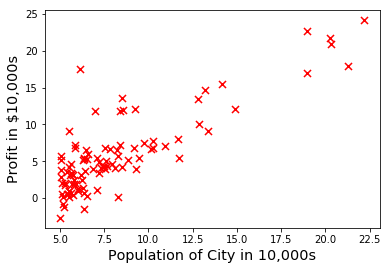

In [4]:
fig, ax = plt.subplots()

# Create a scatter plot using pandas wrapper around matplotlib functions.
scatter = ax.scatter(
    df.loc[:, 'population'], df.loc[:, 'profit'],
    marker='x', color='r', s=50
)

# Customize axes ticks and labels.
ax.set_xlabel(
    'Population of City in 10,000s',
    fontsize='x-large'
)
ax.set_ylabel(
    'Profit in $10,000s',
    fontsize='x-large'
)
ax.tick_params(labelsize='medium')

# Customize current figure.;
fig.set_facecolor('white')

## Computing the cost
- Transform DataFrame into a numpy array and add the bias column;
- Initialize fitting parameters (theta);
- Compute and display initial cost (to test);
- Further testing of the cost function;
- Cost J is given by: $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [5]:
# Number of training examples.
m = len(df.index) 

# Number of features.
n = 1

# Get X and y values and add an extra column of ones (bias) to X.
X = np.hstack(((np.ones((m, 1)), df.loc[:, 'population'].values.reshape(m, n))))
y = df.loc[:, 'profit'].values.reshape(m, 1)

# Compute and display initial cost.
J = cost(X, y, np.array([[0], [0]]))

print('Cost computed with theta = [0; 0]: {}'.format(J))
print('Expected cost value (approx): 32.07')

# Further testing of the cost function.
J = cost(X, y, np.array([[-1], [2]]))

print('\nCost computed with theta = [-1; 2]: {}'.format(J))
print('Expected cost value (approx): 54.24')

Cost computed with theta = [0; 0]: 32.072733877455676
Expected cost value (approx): 32.07

Cost computed with theta = [-1; 2]: 54.24245508201238
Expected cost value (approx): 54.24


## Running Batch Gradient Descent
- Set the number of iterations to take;
- Set the learning rate alpha;
- Set inital values of theta as 0;

In [6]:
# Some gradient descent settings.
num_iters = 1500;
alpha = 0.01;

# Run gradient descent and get theta values.
init_theta = np.zeros((2, 1))
theta = gradient_descent(X, y, init_theta, alpha, num_iters)

print('Theta found by gradient descent: \n{}'.format(theta))
print('Expected theta values (approx): [-3.6303; 1.1664]')

Theta found by gradient descent: 
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx): [-3.6303; 1.1664]


## Plotting the linear fit

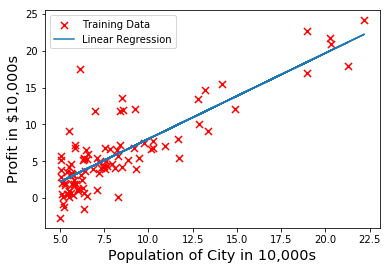

In [7]:
# Create new plot using same old axes.
line, = ax.plot(X[:, 1:], X @ theta)
ax.legend([scatter, line], ['Training Data', 'Linear Regression'])

fig